In [1]:
%run Viborka.ipynb

In [2]:
import math
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import re
import numpy as np

In [3]:
# par = [Vx, Vy, X, Y]
def air(t, par, a, b, alpha):
    sin = math.sin
    cos = math.cos
    sqrt = math.sqrt
    return [-a*sin(alpha)*par[0]-b*cos(alpha)*sqrt(par[0]**2+par[1]**2)*par[0],
           -sin(alpha)-a*sin(alpha)*par[1]-b*sin(alpha)*sqrt(par[0]**2+par[1]**2)*par[1],
           par[0]/(2*cos(alpha)),
           (2*par[1])/sin(alpha)]

In [4]:
def solve(a, b, alpha):
    res = solve_ivp(air, 
                    (0, 2), 
                    [math.cos(alpha), math.sin(alpha), 0, 0], 
                    t_eval=np.linspace(0, 2),
                    args=(a, b, alpha))
    return res

In [5]:
# 3ий квартиль скорости
v0 = float(data['velocity'].quantile([0.75]).iloc[0])
alpha = math.radians(30)
a = a_par(v0)
b = b_par(v0)

In [6]:
L = (v0**2*math.sin(2*alpha))/9.81
H = (v0**2*math.sin(alpha)**2)/(2*9.81)
T = v0*math.sin(alpha)/9.81

In [7]:
res_no_resistance=solve(0, 0, alpha)
res_full=solve(a, b, alpha)

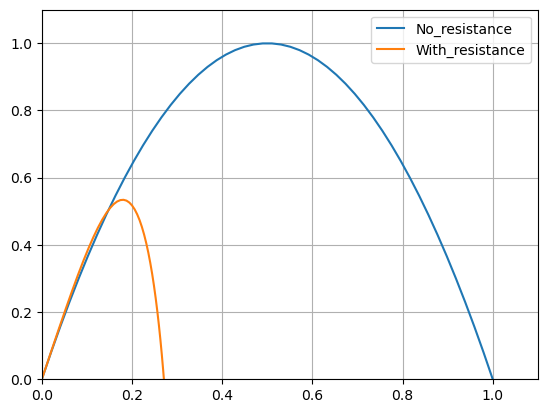

In [8]:
fig, ax = plt.subplots()
ax.plot(res_no_resistance.y[2], res_no_resistance.y[3], label='No_resistance')
ax.plot(res_full.y[2], res_full.y[3], label = 'With_resistance')
ax.set_ylim((0,1.1))
ax.set_xlim((0,1.1))
ax.legend()
ax.grid(True, which='both')

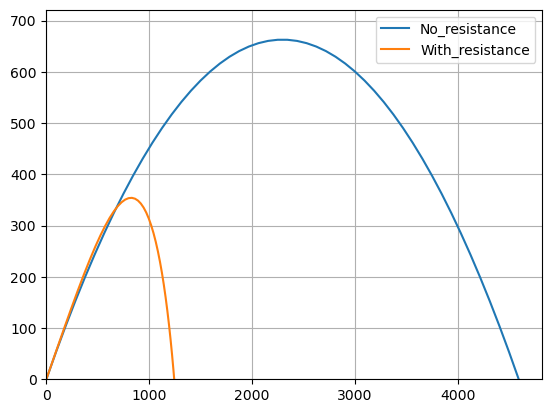

In [9]:
fig_2, ax_2 = plt.subplots()
ax_2.plot(res_no_resistance.y[2]*L, res_no_resistance.y[3]*H, label='No_resistance')
ax_2.plot(res_full.y[2]*L, res_full.y[3]*H, label = 'With_resistance')
ax_2.legend()
ax_2.set_ylim(bottom = 0)
ax_2.set_xlim(left = 0)
ax_2.grid(True, which='both')

In [10]:
length = np.array(res_full.y[2]*L)
height = np.array(res_full.y[3]*H)
time = np.array(res_full.t*T)
Vx = np.array(res_full.y[0]*v0)
Vy = np.array(res_full.y[1]*v0)

In [11]:
Max_H = np.max(height)
Time_H = time[np.argmax(height)]

In [12]:
for id, h in enumerate(height):
    if h>0:
        save_id = id

In [13]:
Max_L = length[save_id]
Max_T = time[save_id]
Velocity = math.sqrt(Vx[save_id]**2+Vy[save_id]**2)

In [14]:
print(f"""Результаты расчета:
Дальность полета: {Max_L:.5},
Максимальная высота подъёма: {Max_H:.5},
Время полёта: {Max_T:.3},
Время, необходимое для подъёма на максимальную высоту: {Time_H:.3},
Модуль скорости в момент падения: {Velocity:.3}.
""")

Результаты расчета:
Дальность полета: 1236.1,
Максимальная высота подъёма: 354.14,
Время полёта: 16.6,
Время, необходимое для подъёма на максимальную высоту: 7.59,
Модуль скорости в момент падения: 72.4.

